# 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import joblib

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')

# Data Importing

In [2]:
train = pd.read_pickle('./data/clustered_apartment.pkl')

# Visualization

## 아파트 동 주소(apartment_addr_town)
- 상위 3개의 동을 봤을 때 고르게 분포하는 것을 확인할 수 있습니다.

In [3]:
def top_list(n):
    for i in range(9):
        top = ' '.join(train.loc[train['cluster']==i,'apartment_addr_town'].value_counts().head(3).index.tolist())
        print(f'{i}번 집단: {top}')
top_list(3)

0번 집단: 길동 상계동 천호동
1번 집단: 신천동 신대방동 도곡동
2번 집단: 방배동 청담동 삼성동
3번 집단: 신월동 신림동 목동
4번 집단: 성내동 내발산동 방배동
5번 집단: 신사동 응암동 천호동
6번 집단: 방배동 불광동 역삼동
7번 집단: 상봉동 휘경동 용두동
8번 집단: 역삼동 목동 도곡동


## 지역구(district_name)
- 집단별로 지역구의 구성이 조금씩 차이나는 것으로 보입니다.
- 7번 집단의 경우 특정 지역에서만 분포하는 것을 확인할 수 있습니다.

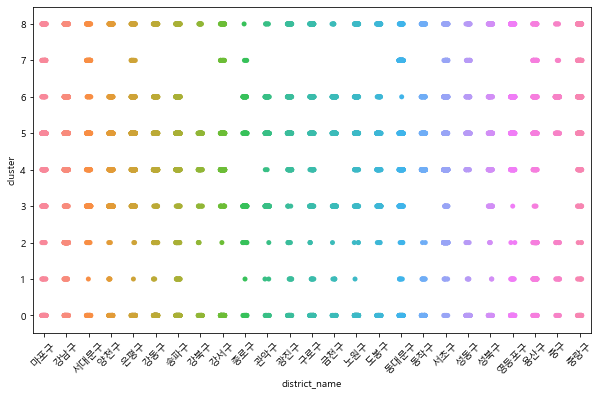

In [4]:
plt.figure(figsize=(10,6))
sns.stripplot(data=train, x='district_name', y='cluster')
plt.xticks(rotation=45)
plt.show()

## 학생 수(school_students)
- 4번 집단의 학생 수가 많은 것을 확인할 수 있습니다.

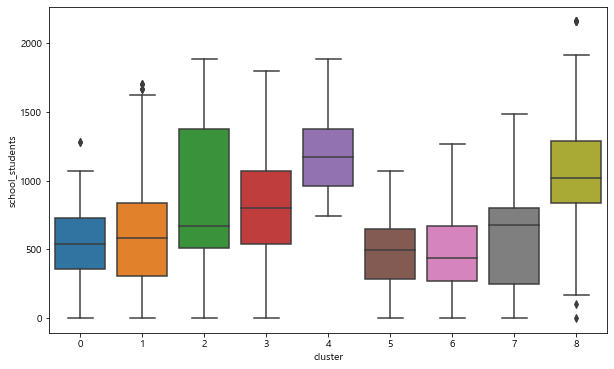

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train, x='cluster', y='school_students')
plt.show()

## 가장 가까운 역의 호선 개수
- 6, 7번 집단이 조금 더 호선이 많은 집단으로 나타났습니다.

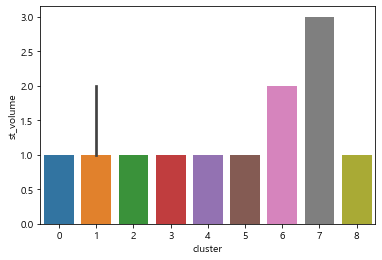

In [6]:
sns.barplot(data=train, x='cluster', y='st_volume', estimator=np.median)
plt.show()